In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



data = pd.read_csv('House_Rent_Dataset.csv')
delhi_data = data[data['City']=="Delhi"]
X = delhi_data[['BHK','Size','Bathroom']]
Y = delhi_data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
RFR = RandomForestRegressor() 
model_RFR = RFR.fit(X_train,y_train)

In [2]:
import numpy as np
import pandas as pd
import sklearn
import pickle

In [3]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Target -> Rent

int features -> BHK(1 to 6), Size(10 to 8000), bathroom (1 to 10) 

Delete -> 'Posted On', 'Point of Contact', 'Floor', 

'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'

In [7]:
#data['Floor'].value_counts() # too many values, delete

#data['Area Type'].value_counts() #too many values,


data['Area Locality'].value_counts() #delete 

data['City'].value_counts().index #['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata']

data['Furnishing Status'].value_counts() # 3 values

data['Tenant Preferred'].value_counts()
#data['Point of Contact'].value_counts() # 3 values but delete 


Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [8]:
delhi_data = data[data['City']=="Delhi"]

delhi_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2382,2022-06-24,2,14000,800,1 out of 3,Super Area,"Keshav Puram, Tri Nagar",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
2383,2022-06-30,1,20000,200,Ground out of 2,Super Area,Hauz Khas,Delhi,Furnished,Bachelors,1,Contact Owner
2384,2022-06-26,3,80000,1800,1 out of 3,Carpet Area,South Extension 1,Delhi,Semi-Furnished,Bachelors/Family,3,Contact Owner
2385,2022-06-08,1,9500,400,2 out of 4,Carpet Area,Neb Sarai,Delhi,Unfurnished,Bachelors/Family,1,Contact Agent
2386,2022-06-08,3,14000,600,2 out of 4,Carpet Area,kst chattarpur Apartments,Delhi,Unfurnished,Bachelors,3,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
2982,2022-06-13,2,31000,1200,3 out of 4,Super Area,Pitampura,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
2983,2022-05-15,1,9000,250,Ground out of 3,Super Area,"Jai laxmi Apartments, Indraprastha Extension, ...",Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner
2984,2022-06-04,2,9000,700,4 out of 5,Super Area,Sant Nagar,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner
2985,2022-07-01,3,27000,1050,Ground out of 4,Carpet Area,"Nalanda Apartment, Vikaspuri",Delhi,Unfurnished,Family,2,Contact Agent


In [9]:
delhi_data.describe()

,BHK,Rent,Size,Bathroom
count,605.000000,605.000000,605.000000,605.000000
mean,2.114050,29461.983471,786.406612,1.852893
std,0.871866,43542.047016,706.999480,0.925993
min,1.000000,2000.000000,25.000000,1.000000
25%,1.000000,11000.000000,300.000000,1.000000
50%,2.000000,17000.000000,600.000000,2.000000
75%,3.000000,30000.000000,1000.000000,2.000000
max,5.000000,530000.000000,4000.000000,7.000000


Target -> Rent (2k to 530k)

Features range -> 

BHK(1 to 5),

Size(25 to 4000),
                 
bathroom (1 to 7) 

In [10]:
viz_data = delhi_data[['BHK', 'Rent', 'Size', 'Bathroom']]

<Axes: >

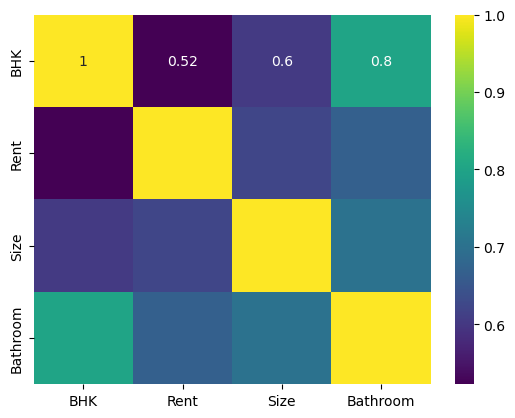

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(viz_data.corr(), cmap='viridis',annot = True )

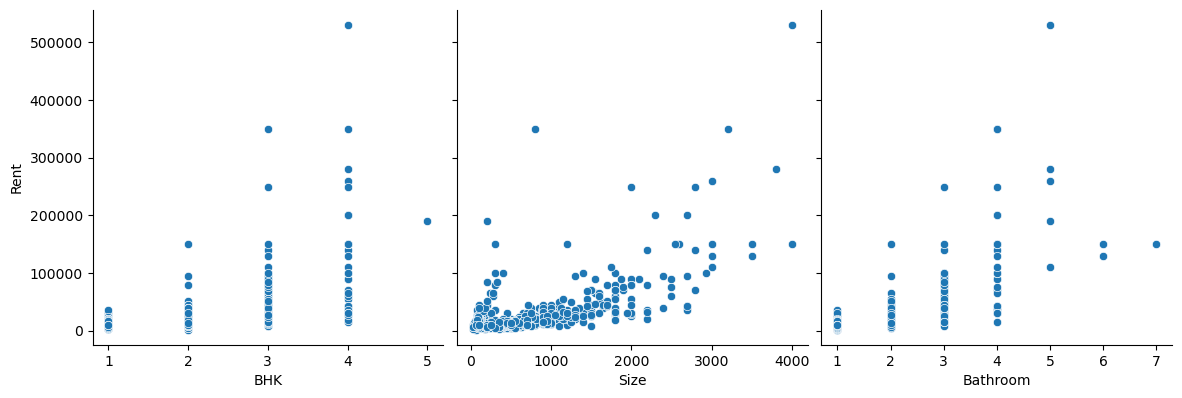

In [12]:
sns.pairplot(viz_data, x_vars=['BHK','Size','Bathroom'], y_vars = 'Rent',height = 4, kind = 'scatter' )
plt.show()

In [13]:
X = delhi_data[['BHK','Size','Bathroom']]
Y = delhi_data['Rent']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression() 
model_LR = LR.fit(X_train,y_train)
Y_pred_LR = model_LR.predict(X_test)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def evaluation_metrics(y_test,Y_pred):
    print("MSE: ",mean_squared_error(y_test,Y_pred))
    print("MAE : ",mean_absolute_error(y_test,Y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y_test,Y_pred)))
    print("R-squared :",r2_score(y_test,Y_pred))

evaluation_metrics(y_test,Y_pred_LR)

MSE:  698957306.8431002
MAE :  15227.337868757084
RMSE :  26437.80071872659
R-squared : 0.45613577541294315


In [17]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
model_KNR = KNR.fit(X_train,y_train)
Y_pred_KNR = model_KNR.predict(X_test)
evaluation_metrics(y_test,Y_pred_KNR)

MSE:  887732280.9917356
MAE :  13110.90909090909
RMSE :  29794.836482043924
R-squared : 0.30924847066396244


In [18]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor() 
model_DTR = DTR.fit(X_train,y_train)
Y_pred_DTR = model_DTR.predict(X_test)
evaluation_metrics(y_test,Y_pred_DTR)

MSE:  1714859214.4296834
MAE :  14908.287297256415
RMSE :  41410.85865361504
R-squared : -0.3343455570185889


In [19]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor() 
model_RFR = RFR.fit(X_train,y_train)
Y_pred_RFR = model_RFR.predict(X_test)
evaluation_metrics(y_test,Y_pred_RFR)

MSE:  1160633564.684063
MAE :  13649.167937787995
RMSE :  34068.072512017214
R-squared : 0.09690181716877677


In [20]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'n_estimators': [100,250,300,500],
                'min_samples_split': [5, 10,15],
               'min_samples_leaf': [2,4,6,10]}

grid_search = GridSearchCV(RFR,param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: ",grid_search.best_params_)
best_model_RFR = grid_search.best_estimator_

Best parameters:  {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}


In [21]:
Y_pred_RFRgs = best_model_RFR.predict(X_test)
evaluation_metrics(y_test,Y_pred_RFRgs)

MSE:  759003545.685906
MAE :  12264.770972939434
RMSE :  27550.01897795909
R-squared : 0.4094133206823246


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
model_GBR = GBR.fit(X_train,y_train)
Y_pred_GBR = model_GBR.predict(X_test)
evaluation_metrics(y_test,Y_pred_GBR)

MSE:  1183370010.3631194
MAE :  13439.004121815544
RMSE :  34400.14549915624
R-squared : 0.07921040844031546


In [24]:
import pickle
pickle.dump(best_model_RFR,open('model.pkl', 'wb'))

In [25]:
scikit-learn --version

NameError: name 'scikit' is not defined